# Algotrading 

In [13]:

%load_ext autoreload
%autoreload 2
# make the necessary imports 
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



from surfingcrypto import Config,TS
from surfingcrypto.algotrading.backtesting import BackTest
from surfingcrypto.algotrading.features import BinaryLaggedFeatures

# set the style and ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
coins={
    "BTC":"",
    "ETH":"",
    "MATIC":"",
    "ADA":"",
    "SOL":""
}
c = Config(coins,"/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")


In [15]:
ticker = "ETH"
ts = TS(c, coin=ticker)
ts.ta_indicators()
ts.df


Open         High          Low        Close  \
Date                                                                            
2017-10-01 00:00:00+00:00   255.288687   256.747390   249.797667   256.044212   
2017-10-02 00:00:00+00:00   256.167001   256.711876   250.857533   253.580263   
2017-10-03 00:00:00+00:00   253.587078   256.395551   245.386642   248.989454   
2017-10-04 00:00:00+00:00   249.237185   254.456920   247.380720   248.964687   
2017-10-05 00:00:00+00:00   249.062535   254.518348   245.716713   252.593705   
...                                ...          ...          ...          ...   
2022-05-02 00:00:00+00:00  2684.030585  2734.287269  2654.372209  2718.791819   
2022-05-03 00:00:00+00:00  2718.546125  2719.287351  2624.402083  2644.522293   
2022-05-04 00:00:00+00:00  2644.194517  2789.713909  2639.987546  2768.699442   
2022-05-05 00:00:00+00:00  2768.305714  2776.983095  2567.971679  2608.436839   
2022-05-06 00:00:00+00:00  2608.169786  2617.175690  2502.838952  2554.894640   

                                 Volume    Market Cap       SMA_26  \
Date                                                                 
2017-10-01 00:00:00+00:00  2.593030e+08  2.430109e+10          NaN   
2017-10-02 00:00:00+00:00  2.893556e+08  2.407106e+10          NaN   
2017-10-03 00:00:00+00:00  2.738634e+08  2.363906e+10          NaN   
2017-10-04 00:00:00+00:00  2.194011e+08  2.364053e+10          NaN   
2017-10-05 00:00:00+00:00  2.166371e+08  2.398902e+10          NaN   
...                                 ...           ...          ...   
2022-05-02 00:00:00+00:00  1.770695e+10  3.279439e+11  2792.000895   
2022-05-03 00:00:00+00:00  1.237582e+10  3.190207e+11  2779.255242   
2022-05-04 00:00:00+00:00  1.712333e+10  3.340372e+11  2772.865437   
2022-05-05 00:00:00+00:00  2.148347e+10  3.147363e+11  2757.841926   
2022-05-06 00:00:00+00:00  1.993458e+10  3.083096e+11  2742.609982   

                                SMA_12      SMA_200      SMA_100  \
Date                                                               
2017-10-01 00:00:00+00:00          NaN          NaN          NaN   
2017-10-02 00:00:00+00:00          NaN          NaN          NaN   
2017-10-03 00:00:00+00:00          NaN          NaN          NaN   
2017-10-04 00:00:00+00:00          NaN          NaN          NaN   
2017-10-05 00:00:00+00:00          NaN          NaN          NaN   
...                                ...          ...          ...   
2022-05-02 00:00:00+00:00  2714.788640  3068.813568  2633.255256   
2022-05-03 00:00:00+00:00  2705.388898  3065.386466  2637.347949   
2022-05-04 00:00:00+00:00  2707.063499  3062.719273  2643.484266   
2022-05-05 00:00:00+00:00  2697.447281  3059.174146  2647.840879   
2022-05-06 00:00:00+00:00  2685.034888  3055.808933  2651.434204   

                           MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  \
Date                                                                    
2017-10-01 00:00:00+00:00           NaN            NaN            NaN   
2017-10-02 00:00:00+00:00           NaN            NaN            NaN   
2017-10-03 00:00:00+00:00           NaN            NaN            NaN   
2017-10-04 00:00:00+00:00           NaN            NaN            NaN   
2017-10-05 00:00:00+00:00           NaN            NaN            NaN   
...                                 ...            ...            ...   
2022-05-02 00:00:00+00:00    -43.665375     -10.112612     -33.552763   
2022-05-03 00:00:00+00:00    -46.651521     -10.479006     -36.172515   
2022-05-04 00:00:00+00:00    -38.553583      -1.904854     -36.648728   
2022-05-05 00:00:00+00:00    -44.554169      -6.324352     -38.229816   
2022-05-06 00:00:00+00:00    -53.018915     -11.831279     -41.187636   

                            BBL_20_2.0   BBM_20_2.0   BBU_20_2.0  BBB_20_2.0  \
Date                                                                           
2017-10-01 00:00:00+00:00          NaN          NaN          NaN         N

## Feature Engineering

The chosen algo uses binary encoding for upward or downward movements.

In [16]:
f = BinaryLaggedFeatures(
    ts,
    indicators=[
        "SMA_12_26_Signal",
        "SMA_100_200_Signal",
        "MACD_12_26_9_Signal",
        "BBL_20_2_Signal",
        "RSI_14_Signal",
    ],
    lags=[1, 2, 3, 7, 14],
)
f


BinaryLaggedFeatures(ts=ETH,lags=[1, 2, 3, 7, 14])

In [17]:
f.indicators

{'i_01': 'SMA_12_26_Signal',
 'i_02': 'SMA_100_200_Signal',
 'i_03': 'MACD_12_26_9_Signal',
 'i_04': 'BBL_20_2_Signal',
 'i_05': 'RSI_14_Signal'}

### Signals

- SMA Cross
- MACD
- Bollinger Bands
- RSI

In [18]:
f.df.tail()


Open         High          Low        Close  \
Date                                                                            
2022-05-02 00:00:00+00:00  2684.030585  2734.287269  2654.372209  2718.791819   
2022-05-03 00:00:00+00:00  2718.546125  2719.287351  2624.402083  2644.522293   
2022-05-04 00:00:00+00:00  2644.194517  2789.713909  2639.987546  2768.699442   
2022-05-05 00:00:00+00:00  2768.305714  2776.983095  2567.971679  2608.436839   
2022-05-06 00:00:00+00:00  2608.169786  2617.175690  2502.838952  2554.894640   

                                 Volume    Market Cap       SMA_26  \
Date                                                                 
2022-05-02 00:00:00+00:00  1.770695e+10  3.279439e+11  2792.000895   
2022-05-03 00:00:00+00:00  1.237582e+10  3.190207e+11  2779.255242   
2022-05-04 00:00:00+00:00  1.712333e+10  3.340372e+11  2772.865437   
2022-05-05 00:00:00+00:00  2.148347e+10  3.147363e+11  2757.841926   
2022-05-06 00:00:00+00:00  1.993458e+10  3.083096e+11  2742.609982   

                                SMA_12      SMA_200      SMA_100  ...  \
Date                                                              ...   
2022-05-02 00:00:00+00:00  2714.788640  3068.813568  2633.255256  ...   
2022-05-03 00:00:00+00:00  2705.388898  3065.386466  2637.347949  ...   
2022-05-04 00:00:00+00:00  2707.063499  3062.719273  2643.484266  ...   
2022-05-05 00:00:00+00:00  2697.447281  3059.174146  2647.840879  ...   
2022-05-06 00:00:00+00:00  2685.034888  3055.808933  2651.434204  ...   

                              RSI_14  SMA_12_26_Signal  SMA_100_200_Signal  \
Date                                                                         
2022-05-02 00:00:00+00:00  47.401841               0.0                 0.0   
2022-05-03 00:00:00+00:00  43.912431               0.0                 0.0   
2022-05-04 00:00:00+00:00  50.476643               0.0                 0.0   
2022-05-05 00:00:00+00:00  43.414647               0.0                 0.0   
2022-05-06 00:00:00+00:00  41.334024               0.0                 0.0   

                           MACD_12_26_9_Signal   PREV_STOCK  PREV_LOWERBB  \
Date                                                                        
2022-05-02 00:00:00+00:00                  0.0  2684.165515   2613.833434   
2022-05-03 00:00:00+00:00                  0.0  2718.791819   2609.535515   
2022-05-04 00:00:00+00:00                  0.0  2644.522293   2598.419611   
2022-05-05 00:00:00+00:00                  0.0  2768.699442   2598.245007   
2022-05-06 00:00:00+00:00                  0.0  2608.436839   2579.534020   

                           PREV_UPPERBB  BBL_20_2_Signal   PREV_RSI  \
Date                                                                  
2022-05-02 00:00:00+00:00   2913.348412              1.0  45.527929   
2022-05-03 00:00:00+00:00   2909.612671              1.0  47.401841   
2022-05-04 00:00:00+00:00   2898.969187              1.0  43.912431   
2022-05-05 00:00:00+00:00   2896.962017              1.0  50.476643   
2022-05-06 00:00:00+00:00   2895.260186              1.0  43.414647   

                           RSI_14_Signal  
Date                                      
2022-05-02 00:00:00+00:00            0.0  
2022-05-03 00:00:00+00:00            0.0  
2022-05-04 00:00:00+00:00            0.0  
2022-05-05 00:00:00+00:00            0.0  
2022-05-06 00:00:00+00:00            0.0  

[5 rows x 28 columns]

### Model dataframe

In [19]:
f.model_df.tail()

ETH  i_01  i_02  i_03  i_04  i_05  \
Date                                                                   
2022-05-02 00:00:00+00:00  2718.791819   0.0   0.0   0.0   1.0   0.0   
2022-05-03 00:00:00+00:00  2644.522293   0.0   0.0   0.0   1.0   0.0   
2022-05-04 00:00:00+00:00  2768.699442   0.0   0.0   0.0   1.0   0.0   
2022-05-05 00:00:00+00:00  2608.436839   0.0   0.0   0.0   1.0   0.0   
2022-05-06 00:00:00+00:00  2554.894640   0.0   0.0   0.0   1.0   0.0   

                            returns  direction  i_01_lag01  i_01_lag02  ...  \
Date                                                                    ...   
2022-05-02 00:00:00+00:00  0.012818          1         0.0         0.0  ...   
2022-05-03 00:00:00+00:00 -0.027697         -1         0.0         0.0  ...   
2022-05-04 00:00:00+00:00  0.045887          1         0.0         0.0  ...   
2022-05-05 00:00:00+00:00 -0.059627         -1         0.0         0.0  ...   
2022-05-06 00:00:00+00:00 -0.020740         -1         0.0         0.0  ...   

                           i_04_lag01  i_04_lag02  i_04_lag03  i_04_lag07  \
Date                                                                        
2022-05-02 00:00:00+00:00         1.0         1.0         1.0         1.0   
2022-05-03 00:00:00+00:00         1.0         1.0         1.0         1.0   
2022-05-04 00:00:00+00:00         1.0         1.0         1.0         1.0   
2022-05-05 00:00:00+00:00         1.0         1.0         1.0         1.0   
2022-05-06 00:00:00+00:00         1.0         1.0         1.0         1.0   

                           i_04_lag14  i_05_lag01  i_05_lag02  i_05_lag03  \
Date                                                                        
2022-05-02 00:00:00+00:00         1.0         0.0         0.0         0.0   
2022-05-03 00:00:00+00:00         1.0         0.0         0.0         0.0   
2022-05-04 00:00:00+00:00         1.0         0.0         0.0         0.0   
2022-05-05 00:00:00+00:00         1.0         0.0         0.0         0.0   
2022-05-06 00:00:00+00:00         1.0         0.0         0.0         0.0   

                           i_05_lag07  i_05_lag14  
Date                                               
2022-05-02 00:00:00+00:00         0.0         0.0  
2022-05-03 00:00:00+00:00         0.0         0.0  
2022-05-04 00:00:00+00:00         0.0         0.0  
2022-05-05 00:00:00+00:00         0.0         0.0  
2022-05-06 00:00:00+00:00         0.0         0.0  

[5 rows x 33 columns]

### Build and Apply Classification Machine Learning Algorithms

Select Logistic regression, Gaussian Naive Bayes, Support Vector Machine, Random Forest, and MLP Classifier approaches to predict the market direction. Please refer sklearn documentation for detail on these and other algorithms.
https://scikit-learn.org/stable/index.html

In [20]:
# create a dictionary of selected algorithms
models = {
    "log_reg": linear_model.LogisticRegression(),
    "gauss_nb": GaussianNB(),
    "svm": SVC(),
    "random_forest": RandomForestClassifier(max_depth=10, n_estimators=100),
    "MLP": MLPClassifier(max_iter=500),
}


In [21]:
# function that fits all models.
def fit_models(f:BinaryLaggedFeatures):
    mfit = {
        model: models[model].fit(f.model_df[f.x_cols_names], f.model_df["direction"])
        for model in models.keys()
    }



In [22]:
# function that predicts (derives all position values) from the fitted models
def estimate_positions(f:BinaryLaggedFeatures):
    for model in models.keys():
        f.model_df["pos_" + model] = models[model].predict(f.model_df[f.x_cols_names])



In [23]:
# fit the models
fit_models(f)
# estimate
estimate_positions(f)


### Strategy evalutation using Backtrader

Strategy: 
1.	Buy when the predicted value is +1 and sell (only if stock is in possession) when the predicted value is -1.
2.	All-in strategy—when creating a buy order, buy as many shares as possible.
3.	Short selling is not allowed

In [24]:
start = "2021-01-01"

performance = {}
backtests = {}
for key in models.keys():
    # run
    i_backtest = BackTest(f,start, algo=key, verbose=False)
    i_backtest.run()
    backtests[key] = i_backtest
    performance[key] = i_backtest.performance_stats()
performance = pd.DataFrame(performance)



In [25]:
performance


log_reg      gauss_nb           svm  random_forest  \
Annual return            2.564663      2.529885      4.203794       0.978609   
Cumulative returns      10.900353     10.675182     23.870649       2.779476   
Annual volatility        0.603994      0.745243      0.623922       0.588205   
Sharpe ratio             2.406153      2.068242      2.957524       1.451790   
Calmar ratio            11.118809      5.106139     15.430330       2.109274   
Stability                0.935180      0.931734      0.904631       0.645692   
Max drawdown            -0.230660     -0.495459     -0.272437      -0.463955   
Omega ratio              1.682556      1.516160      1.849788       1.388161   
Sortino ratio            4.264629      3.305036      5.372291       2.385068   
Skew                     0.673918      0.128181      0.682008       0.607775   
Kurtosis                 6.308156      5.751631      4.969661       7.579138   
Tail ratio               1.691768      1.366532      1.688898       1.427232   
Daily value at risk     -0.070329     -0.087775     -0.071284      -0.070718   
End Value            14875.441592  14593.977885  31088.311719    4724.344382   

                             MLP  
Annual return           1.177289  
Cumulative returns      3.554071  
Annual volatility       0.558651  
Sharpe ratio            1.668339  
Calmar ratio            3.317701  
Stability               0.715317  
Max drawdown           -0.354851  
Omega ratio             1.496909  
Sortino ratio           2.890822  
Skew                    0.948019  
Kurtosis                8.725822  
Tail ratio              1.421523  
Daily value at risk    -0.066685  
End Value            5692.589229

## Choose best model from backtesting results

Choose the one with the greates cumulative returns.

In [26]:
print(performance.loc["Cumulative returns"].idxmax())
backtest = backtests[performance.loc["Cumulative returns"].idxmax()]



svm


In [27]:
backtest.end_value


31088.311718931134

In [28]:
backtest.print_log()


2021-01-02, Open: 600.888, Close: 638.266
2021-01-02,     BUY CREATED --- Size: 2.060, Price: 600.860, Cost: 1237.500
2021-01-02,     BUY EXECUTED --- Size: 2.060, Price: 600.888, Cost: 1237.559, Commission: 12.376
2021-02-07, Open: 1392.314, Close: 1339.759
2021-02-07,     SELL CREATED --- Size: -2.060, Price: 1392.514, Cost: -2867.951
2021-02-07,     SELL EXECUTED --- Size: -2.060, Price: 1392.314, Cost: -2867.539, Commission: 28.675
2021-02-07,          -> OPERATION RESULT --- Gross: 1629.980, Net: 1588.929
2021-02-28, Open: 1209.284, Close: 1171.184
2021-02-28,     BUY CREATED --- Size: 2.324, Price: 1209.377, Cost: 2810.539
2021-02-28,     BUY EXECUTED --- Size: 2.324, Price: 1209.284, Cost: 2810.323, Commission: 28.103
2021-05-13, Open: 3170.256, Close: 3076.269
2021-05-13,     SELL CREATED --- Size: -2.324, Price: 3134.596, Cost: -7284.661
2021-05-13,     SELL EXECUTED --- Size: -2.324, Price: 3170.256, Cost: -7367.535, Commission: 73.675
2021-05-13,          -> OPERATION RESULT

# Plotting

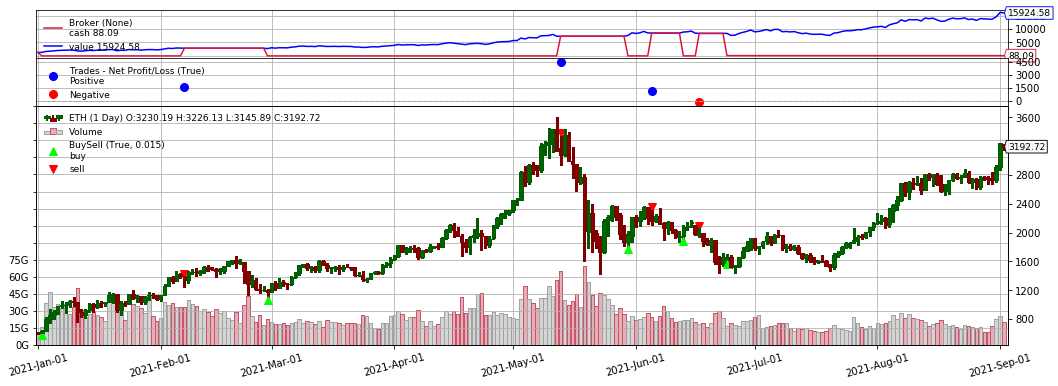

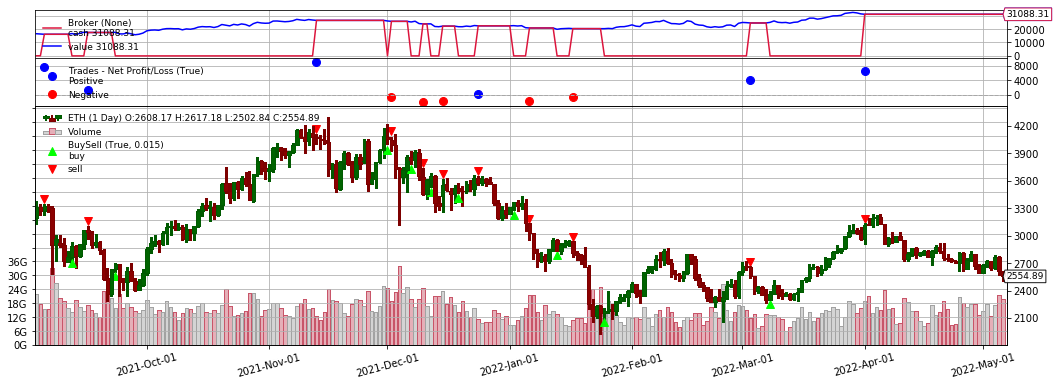

[[<Figure size 1080x360 with 4 Axes>, <Figure size 1080x360 with 4 Axes>]]

In [29]:
backtest.plot_timeline()

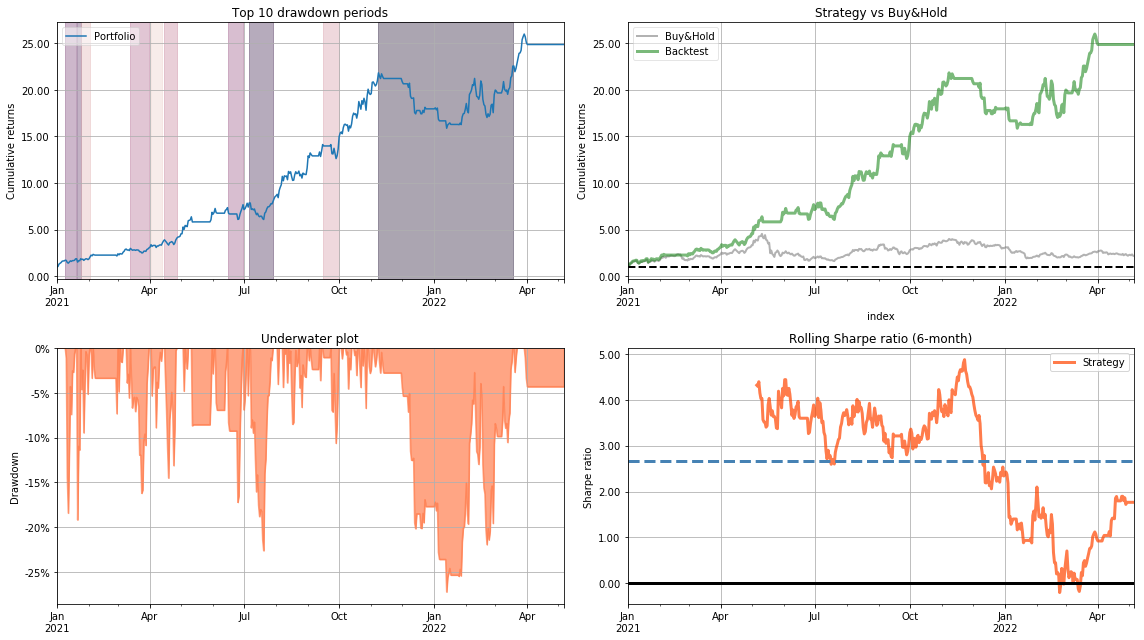

In [30]:
_=backtest.plot_performance()

# Apply to future

In [31]:

if models["svm"].predict(f.get_future_x().to_numpy().reshape(1, -1))[0] > 0:
    print("BUY!")
else:
    print("SELL / STAY OUT OF MARKET")


SELL / STAY OUT OF MARKET
